# Домашнее задание на тему "линейная регрессия" (100 баллов)

***Дедлайн: 23:59 16 февраля***

### Небольшая математическая справка

Линейная регрессия — это метод, который моделирует зависимость между зависимой переменной $Y$ и одной или несколькими независимыми переменными  $X$.

Основная модель:
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \varepsilon$$

Здесь:
- $\beta_0$ — свободный член (intercept),
- $\beta_j$ — коэффициенты регрессии,
- $\varepsilon$ — случайная ошибка.

Метод наименьших квадратов (МНК) минимизирует сумму квадратов отклонений:
$$RSS(\beta) = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

Решение в матричной форме:
$$\hat{\beta} = (X^TX)^{-1}X^TY$$

## Задача 1: Простая линейная регрессия (16 баллов)
Даны синтетические данные $X$ и $Y$, между которыми существует линейная зависимость:
$$Y = 2.5X + \varepsilon,$$
где $\varepsilon$ - случайный шум. 

Задание:
1. (2 балла) Сгенерируйте 100 наблюдений для $X$ из равномерного распределения на интервале $[0,10]$.
2. (4 балла) Добавьте шум $\varepsilon \sim \mathcal{N}(0, \sigma^2)$, где $\sigma = 2$.
3. (6 баллов) Постройте модель линейной регрессии и визуализируйте результаты.
4. (4 балла) Вычислите среднеквадратичную ошибку (MSE).

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

***Start your code***

In [123]:
# Генерируем данные

np.random.seed(42)
N = 100
X = np.random.uniform(0, 10, size=N).reshape(-1, 1)

# Добавляем шум
noise = np.random.normal(loc=0, scale=2, size=N)
Y = 2.5 * X.flatten() + noise

In [124]:
# Обучаем модель

model = LinearRegression().fit(X, Y)

# Определяем коэффициенты
intercept = model.intercept_
slope = model.coef_[0]

print(f'Свободный член : {intercept:.2f}')
print(f'Коэффициент наклона : {slope:.2f}')

Свободный член : 0.43
Коэффициент наклона : 2.41


In [125]:
# Предсказания

X_line = np.linspace(0, 10, 100).reshape(-1, 1)
Y_line = intercept + slope * X_line

# Посчитаем MSE
Y_pred = model.predict(X)
MSE = mean_squared_error(Y, Y_pred)     # среднеквадратичная ошибка
print(f'Mean Squared Error (MSE): {MSE:.2f}')

Mean Squared Error (MSE): 3.23


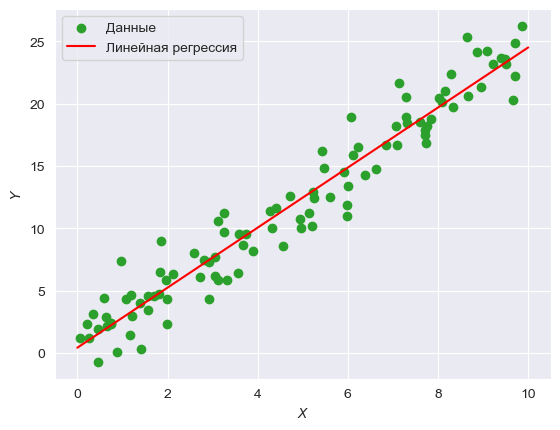

In [126]:
# Визуализация

plt.scatter(X, Y,  color='tab:green', label='Данные')
plt.plot(X_line, Y_line, color='r', label='Линейная регрессия')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.legend()
plt.grid(True)

plt.show()

***End your code***

## Задача 2: Множественная линейная регрессия (16 баллов)
Используя датасет **California Housing**, выполните следующие задания:
1. (2 балла) Разделите данные на обучающую и тестовую выборки (80\% / 20\%).
2. (2 балла) Постройте модель линейной регрессии для предсказания стоимости жилья.
3. (4 балла) Вычислите среднеквадратичную ошибку (MSE) на тестовой выборке.
4. (8 баллов) Проанализируйте важность признаков модели.

In [127]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [128]:
# Загрузка набора данных
dataset = fetch_california_housing(as_frame=True)

# Получение заголовков (названий признаков)
feature_names = dataset.feature_names

# Вывод заголовков
for feature_name in feature_names:
    print(feature_name)

X, Y = dataset.data, dataset.target

MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude


***Start your code***

In [129]:
# Разделение на обучающую и тестовую выборки

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [130]:
# Обучение модели

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [131]:
# Оценка качества модели

Y_pred = model.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred)
print(f'Среднеквадратичная ошибка (MSE): {MSE:.2f}')

Среднеквадратичная ошибка (MSE): 0.56


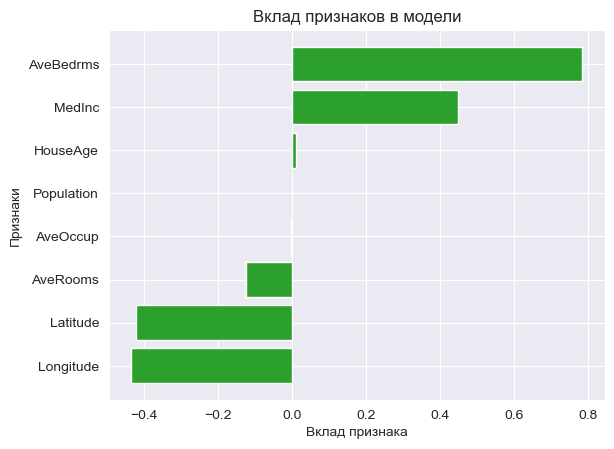

In [132]:
# Анализ важности признаков

feature_importance = model.coef_

features = np.array(feature_names)[np.argsort(feature_importance)]
importance = feature_importance[np.argsort(feature_importance)]

plt.barh(features, importance, color='tab:green')
plt.xlabel('Вклад признака')
plt.ylabel('Признаки')
plt.title('Вклад признаков в модели')

plt.show()

***End your code***

## Роль параметра сдвига в линейной регрессии и проверке предположений МНК

Сдвиг (intercept, свободный член) в модели линейной регрессии необходимо для учета ненулевого среднего значения зависимой переменной $Y$, когда все предикторы равны нулю. В контексте проверки предположений метода наименьших квадратов (МНК) смещение играет важную роль, так как его отсутствие может привести к систематическим ошибкам и неверным выводам.

### Зачем нужен сдвиг?
**Первое:** для корректности модели. Если свободный член не включен, модель принудительно проходит через начало координат ($Y = 0$ при $X_i = 0$). Это может привести к неверной аппроксимации данных.
    
**Второе:** несмещённость оценок. При отсутствии свободного члена оценки коэффициентов могут быть смещёнными, что нарушает ключевое предположение МНК о несмещённости оценок: $E(\hat{\beta}) = \beta.$
    
**Третье:** геометрическая интерпретация: В матричной форме регрессии:$Y = X\beta + \varepsilon$, если $X$ не включает столбец из единиц (отвечающий за смещение), пространство предсказанных значений $Y$ может быть неправильно ориентировано.
    
**Четвертое:** корректная проверка гетероскедастичности. При анализе остатков важно учитывать возможные систематические отклонения, иначе ошибки модели могут быть неправильно интерпретированы.

### Практическая реализация
В Python добавление сдвига выполняется с помощью команды:

```python 
import statsmodels.api as sm
X_const = sm.add_constant(X_train) # добавляет единичный столбец
ols_model = sm.OLS(Y_train, X_const).fit()
```
Этот шаг гарантирует, что свободный член включён в модель, что делает её более точной и корректной.

### Резюме
Добавление смещения — стандартная практика при построении линейных моделей, позволяющая избежать смещения оценок, корректно интерпретировать результаты и правильно проверять предположения МНК.

## Задача 3: Проверка предположений МНК (10 баллов)
Для модели из предыдущего задания проверьте предположения метода наименьших квадратов (нужна OLS-модель):
1. (4 балла) Вычислите коэффициент детерминации $R^2$.
2. (6 баллов) Постройте график остатков модели. Правильная форма распределения остатков похожа на квадрат или близкий ему прямоугольник. Если наблюдается какая-либо неправильная фигура, то нарушены требования постоянной вариации (гетероскедастичность).

In [133]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

***Start your code***

In [134]:
# Добавляем единичный столбец для сдвига

X_const_train = sm.add_constant(X_train)
X_const_test = sm.add_constant(X_test)

In [135]:
# Строим регрессионную модель

model = sm.OLS(Y_train, X_const_train).fit()

In [136]:
# Коэффициент детерминации

Y_pred = model.predict(X_const_test)
r2 = r2_score(Y_test, Y_pred)
print(f'Коэффициент детерминации R^2: {r2:.2f}')

Коэффициент детерминации R^2: 0.58


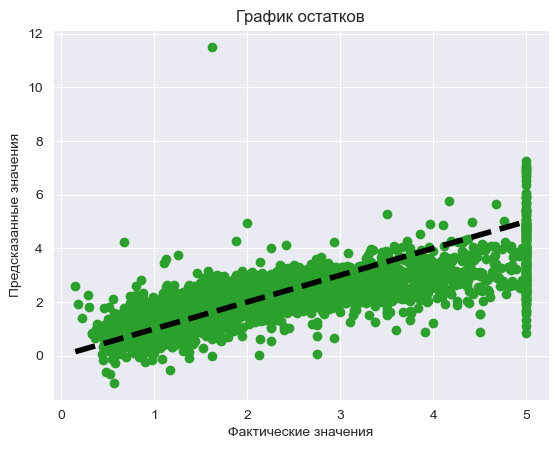

In [137]:
# Построение графика остатков

plt.scatter(Y_test, Y_pred, color='tab:green', label='Тестовые данные')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
plt.title('График остатков')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.grid(True)

plt.show()

***End your code***

## Задача 4: Лог-линейная регрессия (26 баллов)
Используя логарифмическое преобразование признаков, выполните следующие шаги:
1. (4 балла) Загрузите датасет **California Housing** и выберите переменные *MedInc, HouseAge, AveRooms, AveOccup* в качестве признаков.
2. (4 балла) Выполните логарифмическое преобразование: $X' = \log(1 + X)$ для каждого признака.
3. (8 балла) Постройте две модели линейной регрессии: одну с обычными признаками, вторую с лог-преобразованными.
4. (6 балла) Сравните качество моделей по MSE и $R^2$ на тестовой выборке.
5. (4 балла) Постройте графики остатков для обеих моделей.

### Комментарий:
1. Сравнение MSE и $R^2$ показывает, какая модель лучше предсказывает результаты.
2. Анализ графиков остатков позволяет выявить возможные проблемы гетероскедастичности. Правильная форма распределения остатков похожа на квадрат или близкий ему прямоугольник. Если наблюдается какая-либо неправильная фигура, то нарушены требования постоянной вариации (гетероскедастичность).
3. Лог-преобразование может улучшить качество предсказаний, если данные содержат асимметричные распределения.

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import fetch_california_housing

***Start your code***

In [139]:
# Загружаем датасет California Housing

dataset = fetch_california_housing(as_frame=True)

In [140]:
# Выбираем признаки и целевую переменную

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']
X, Y = X[features], dataset.target

In [141]:
# Разделяем данные на обучающую и тестовую выборки

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [142]:
# Логарифмическое преобразование признаков

X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

In [143]:
# Обучение моделей

model = LinearRegression()
model_log = LinearRegression()

model.fit(X_train, Y_train)
model_log.fit(X_train_log, Y_train)

LinearRegression()

In [144]:
# Предсказания

Y_pred = model.predict(X_test)
Y_log_pred = model_log.predict(X_test_log)

In [145]:
# Оценка моделей

MSE = mean_squared_error(Y_test, Y_pred)
R2 = r2_score(Y_test, Y_pred)

MSE_log = mean_squared_error(Y_test, Y_log_pred)
R2_log = r2_score(Y_test, Y_log_pred)

print(f'Обычная модель: MSE = {MSE:.4f}, R^2 = {R2:.4f}')
print(f'Лог-линейная модель: MSE = {MSE_log:.4f}, R^2 = {R2_log:.4f}')

Обычная модель: MSE = 0.6575, R^2 = 0.4983
Лог-линейная модель: MSE = 0.6108, R^2 = 0.5339


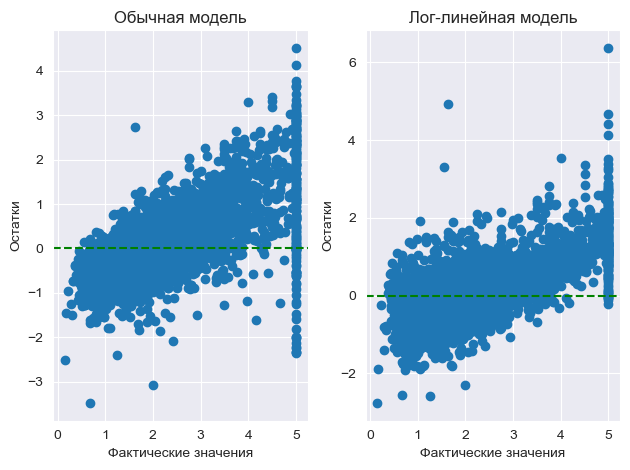

In [146]:
# Визуализация остатков

fig, axes = plt.subplots(1, 2)
axes[0].scatter(Y_test, Y_test - Y_pred)
axes[0].axhline(0, color='green', linestyle='--')
axes[0].set_xlabel('Фактические значения')
axes[0].set_ylabel('Остатки')
axes[0].set_title('Обычная модель')

axes[1].scatter(Y_test, Y_test - Y_log_pred)
axes[1].axhline(0, color='green', linestyle='--')
axes[1].set_xlabel('Фактические значения')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Лог-линейная модель')

plt.tight_layout()
plt.show()

***End your code***

## Задача 5: Применение регрессии к датасету CO2 emissions (32 балла)
Используя датасет **CO2 Emissions Canada** (файл 'co2_emissions_canada.csv'), выполните следующие задачи:
1. (4 балла) Загрузите датасет, выберите признаки: *Engine Size(L), Cylinders, Fuel Consumption Comb (L/100 km)*.
2. (2 балла) Разделите данные на обучающую и тестовую выборки $80\% / 20\%$.
3. (2 балла) Постройте модель множественной линейной регрессии для предсказания выбросов $CO_2$.
4. (6 балла) Оцените важность признаков, используя коэффициенты модели.
5. (6 балла) Рассчитайте метрики качества модели: MSE, $R^2$.
6. (6 балла) Визуализируйте фактические и предсказанные выбросы $CO_2$, а также остатки модели.
7. (6 балла) Сделайте выводы о качестве модели и значимости признаков (постройте график с 'plt.xlabel("Значимость коэффициента")' и 'plt.ylabel("Признаки")').

***Start your code***

In [147]:
# Загружаем данные
import pandas as pd

df = pd.read_csv('/Users/arty/Desktop/co2_emissions.csv')

df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244


In [148]:
# Выбираем признаки

features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']
X, Y = df[features], df['CO2 Emissions(g/km)']

In [149]:
# Разделение данных

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [150]:
# Обучение модели

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [151]:
# Оценка модели

Y_pred = model.predict(X_test)

MSE = mean_squared_error(Y_test, Y_pred)
R2 = r2_score(Y_test, Y_pred)

print(f'MSE для CO2 модели: {MSE:.2f}')
print(f'Коэффициент детерминации R^2: {R2:.2f}')

MSE для CO2 модели: 421.92
Коэффициент детерминации R^2: 0.88


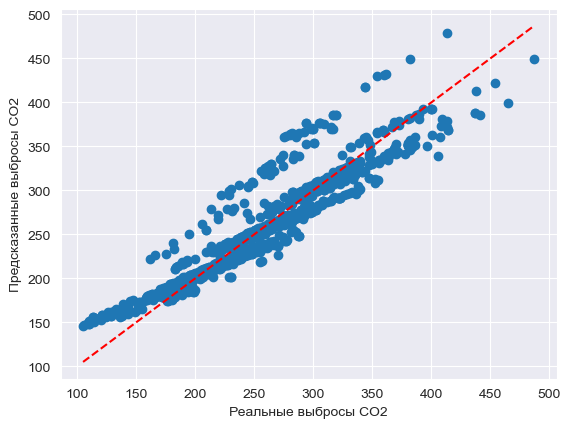

In [152]:
# Визуализация результатов

plt.scatter(Y_test, Y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel('Реальные выбросы CO2')
plt.ylabel('Предсказанные выбросы CO2')
plt.grid(True)

plt.show()

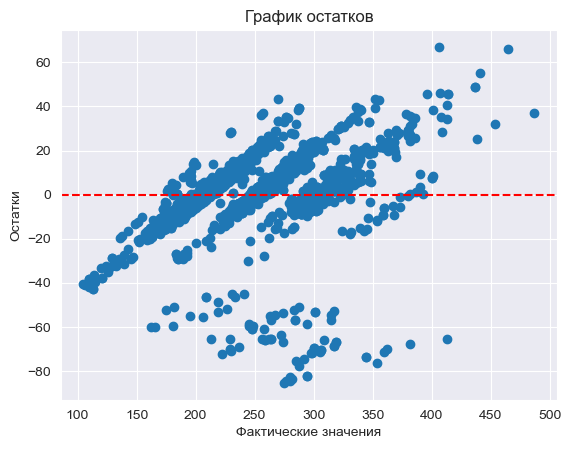

In [153]:
# Визуализация остатков

plt.scatter(Y_test, Y_test - Y_pred)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Фактические значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.grid(True)

plt.show()

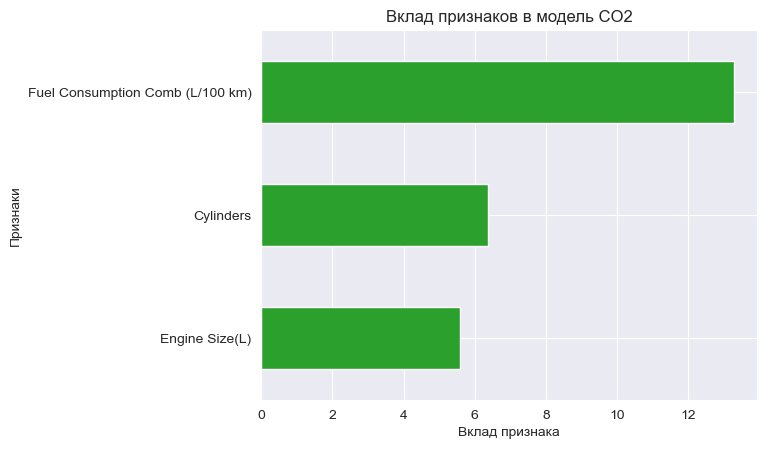

In [154]:
# Анализ вклада признаков

coef_importance = pd.Series(model.coef_, index=features)
coef_importance.plot(kind='barh', color='tab:green')
plt.xlabel('Вклад признака')
plt.ylabel('Признаки')
plt.title('Вклад признаков в модель CO2')

plt.show()

***End your code***